# How to use this file?
###  1) Move "DATASET_SORTED" folder as local folder for Jupyter
###  2) Run all

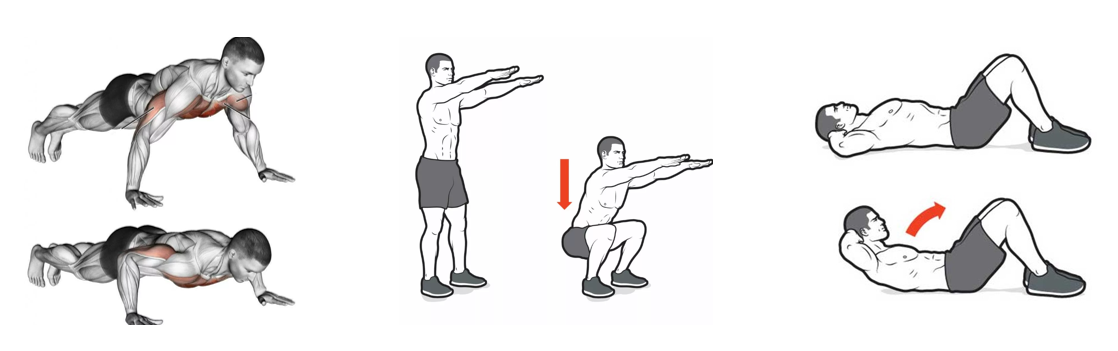

# Способ крепления

![image](./img/karman.png)

# Существующие решения

![image](./img/exist.png)

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import random
%matplotlib inline
from matplotlib import style
style.use('seaborn')
import seaborn as sns
sns.set()

# Глобальные переменные

In [2]:
Step = 128 # количество сэмплов на канал после нормализации

# Пути до всех файлов

In [3]:
paths = []

FOLDER = '\FFT'
FOLD = '\A'
paths.append(r'DATASET_SORTED\0.Вращение рук (266)'+str(FOLDER)+str(FOLD)) #0
paths.append(r'DATASET_SORTED\1.Выпады (142)'+str(FOLDER)+str(FOLD)) #1
paths.append(r'DATASET_SORTED\3.Отжимания (238)'+str(FOLDER)+str(FOLD)) #2
paths.append(r'DATASET_SORTED\4.Подъем рук (240)'+str(FOLDER)+str(FOLD)) #3
paths.append(r'DATASET_SORTED\5.Пресс (247)'+str(FOLDER)+str(FOLD)) #4
paths.append(r'DATASET_SORTED\6.Приседания (421)'+str(FOLDER)+str(FOLD)) #5
paths.append(r'DATASET_SORTED\7.Прыжки на месте (270)'+str(FOLDER)+str(FOLD)) #6

# Названия всех упражнений

In [4]:
exercise = []
exercise.append ('Вращение рук') # 0
exercise.append ('Выпады') # 1
exercise.append ('Отжимания') # 2
exercise.append ('Подъем рук') # 3
exercise.append ('Пресс') # 4
exercise.append ('Приседания') # 5
exercise.append ('Прыжки на месте') # 6

# Нормализация, интерполяция

In [5]:
# renormalize(X input, Y input, Z input, K (the number of out samples), val (the number of exercise)):
def renormalize(X, Y, Z, K, val):
    
    if (not X.size == Y.size == Z.size):
        print('errorarraysize')
    N = X.size
    
    max = abs(np.max(X))
    if (abs(np.max(Y)) > max):
        max = abs(np.max(Y))
    if (abs(np.max(Z)) > max):
        max = abs(np.max(Z))
        
    Xn = X/max
    Yn = Y/max
    Zn = Z/max
    
    dn = (N-1)/(K-1)
    nj = np.arange(0, K)*dn
    
    Xnm = np.zeros(K)
    Ynm = np.zeros(K)
    Znm = np.zeros(K)
    
    Xnm[0] = Xn[0]
    Ynm[0] = Yn[0]
    Znm[0] = Zn[0]
    
    for j in range(1,K-1):
        Xnm[j] = Xn[int(nj[j])] + ((nj[j] - int(nj[j])) / (int(nj[j]+1)-int(nj[j]))) * (Xn[int(nj[j]+1)]-Xn[int(nj[j])])
        Ynm[j] = Yn[int(nj[j])] + ((nj[j] - int(nj[j])) / (int(nj[j]+1)-int(nj[j]))) * (Yn[int(nj[j]+1)]-Yn[int(nj[j])])
        Znm[j] = Zn[int(nj[j])] + ((nj[j] - int(nj[j])) / (int(nj[j]+1)-int(nj[j]))) * (Zn[int(nj[j]+1)]-Zn[int(nj[j])])

    Xnm[K-1] = Xn[N-1]
    Ynm[K-1] = Yn[N-1]
    Znm[K-1] = Zn[N-1]

    return Xnm, Ynm, Znm, K, val

# Обработка данных: из разных файлов в единый датафрейм

![image](./img/files.png)

# Структура датасета:

![image](./img/dsstruct.png)
#### Масштабируем данные в 1 колонку с осями X,Y,Z,val

In [6]:
# scaler(filename (the name of input file), counter(the number of exercise))
def scaler(filename, counter):
    df = pd.read_csv(filename, delimiter=',')

    XX = df['x']
    YY = df['y']
    ZZ = df['z']
    val = df['val'][0]

    a = renormalize(XX,YY,ZZ,Step, val)

    df1 = pd.DataFrame(a[0])
    df2 = pd.DataFrame(a[1])
    df3 = pd.DataFrame(a[2])

    df4 = pd.concat([df1, df2,df3], axis=0, ignore_index=True)
    df4.loc[df4.size] = counter
    return df4

#### Объединяем все колонки из текущей папки в единый датафрейм (1 упражнение)

In [7]:
# mergeOnePath(pathOne (merge from this folder), counter(the number of exercise))
def mergeOnePath(pathOne, counter):
    all_files = glob.glob(pathOne + "/*.csv")
    
    liOne = []

    for filenameOne in all_files:
        dfOne = scaler(filenameOne, counter)
        liOne.append(dfOne)
    frameOne = pd.concat(liOne, axis=1, ignore_index=True)
    
    return frameOne

#### Объединяем векторы всех папок

In [8]:
# mergeMultiplePath(pathsMultiple(merge from these folders)):
frameMultiple = []
def mergeMultiplePath(pathsMultiple):
    counter = 0
    liMultiple = []
    
    for pathMultiple in pathsMultiple:
        frameMultiple = mergeOnePath(pathMultiple, counter)
        liMultiple.append(frameMultiple)
        counter = counter + 1
    frameMultiple = pd.concat(liMultiple, axis=1, ignore_index=True)
    return frameMultiple

#### Объединяем все файлы со всех папок

In [9]:
# merge all files from folders from paths[]
df = mergeMultiplePath(paths)

#### Смотрим на полученный датасет

In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823
0,0.556713,0.359893,0.092545,0.313176,0.383985,0.301220,0.378118,0.395058,0.385130,0.334911,...,0.089315,0.052965,0.091322,0.084108,0.084622,0.113228,0.142534,0.128578,0.143020,0.123569
1,0.523089,0.338745,0.084938,0.296412,0.361144,0.282463,0.354607,0.368006,0.355453,0.313491,...,0.086063,0.053320,0.087165,0.078948,0.082035,0.103850,0.129301,0.117144,0.129601,0.112588
2,0.489464,0.317597,0.077331,0.279648,0.338303,0.263707,0.331097,0.340953,0.325775,0.292072,...,0.082812,0.053674,0.083008,0.073787,0.079448,0.094471,0.116068,0.105710,0.116183,0.101607
3,0.455840,0.296450,0.069724,0.262884,0.315462,0.244951,0.307586,0.313900,0.296097,0.270653,...,0.079561,0.054029,0.078850,0.068626,0.076860,0.085093,0.102835,0.094277,0.102764,0.090626
4,0.422216,0.275302,0.062116,0.246120,0.292622,0.226195,0.284075,0.286847,0.266420,0.249234,...,0.076309,0.054383,0.074693,0.063465,0.074273,0.075714,0.089602,0.082843,0.089345,0.079645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.005361,0.008821,0.004175,0.009470,0.038020,0.013949,0.010324,0.009903,0.005878,0.018685,...,0.009416,0.011095,0.005967,0.014631,0.011959,0.013977,0.003908,0.010624,0.020040,0.020046
381,0.004832,0.008263,0.004347,0.009072,0.039687,0.014243,0.008901,0.009525,0.004731,0.019793,...,0.008985,0.009060,0.005896,0.012118,0.011926,0.013748,0.004160,0.011034,0.020347,0.020741
382,0.004303,0.007704,0.004519,0.008674,0.041353,0.014537,0.007479,0.009146,0.003583,0.020900,...,0.008553,0.007024,0.005826,0.009605,0.011893,0.013519,0.004411,0.011444,0.020654,0.021435
383,0.003774,0.007146,0.004690,0.008276,0.043020,0.014831,0.006057,0.008768,0.002436,0.022008,...,0.008122,0.004988,0.005755,0.007093,0.011860,0.013290,0.004663,0.011854,0.020961,0.022129


# Максимальное значение в датасете
### Убеждаемся, что нет слишком больших значений

In [11]:
max_in_dataset = df[0:][:3*Step].max().max()
print()
print('-Максимальное значение в датасете', max_in_dataset)
print()


-Максимальное значение в датасете 1.0



# Количество NaN в датасете
### Убеждаемся, что нет NaN значений

In [12]:
num_of_nulls = df.isnull().sum().sum()
print()
print('-Количество NaN в датасете', num_of_nulls)
print()


-Количество NaN в датасете 0



# Количество упражнений

In [13]:
amount_of_ex = df.iloc[3*Step][0:].value_counts()
print()
print('-Список упражнений\n',amount_of_ex)
print()

total_amout_of_ex = df.iloc[3*Step][0:].value_counts().sum()
print()
print('-Общее количество упражнений в датасете', total_amout_of_ex)
print()

print()
print('-Список названий',exercise)
print()


-Список упражнений
 5.0    421
6.0    270
0.0    266
4.0    247
3.0    240
2.0    238
1.0    142
Name: 384, dtype: int64


-Общее количество упражнений в датасете 1824


-Список названий ['Вращение рук', 'Выпады', 'Отжимания', 'Подъем рук', 'Пресс', 'Приседания', 'Прыжки на месте']



# Сравним графики одного и того же упражнения

Сравним графики двух случайно выбранных повторений одного и того же упражнения.

Что мы видим?

Графики очень похожи друг на друга

In [14]:
# функция печать упражнения "number", состоящего из "step" сэмплов
def plotTimeSeries(step, number):
    plt.plot(df.index[0:step], df[0:step][number],'-' , color='r', label='x')
    plt.plot(df.index[0:step], df[Step:2*step][number],'-' , color='g', label='y')
    plt.plot(df.index[0:step], df[2*Step:3*step][number],'-' , color='b', label='z')
    plt.legend()
    plt.ylabel('Amplitude')
    plt.xlabel('Time');
    plt.title('Временной ряд: ' + exercise[int(df[number][step*3])], fontsize=20, loc="left")
    plt.grid()
    return None

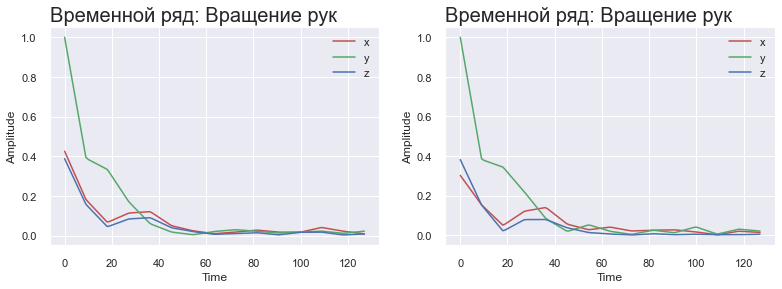

In [15]:
fig = plt.figure(figsize=(13, 4)) # define the size of plots

sbp = plt.subplot(1, 2, 1)
sbp.grid()
plotTimeSeries(Step,random.randint(0,200))

sbp = plt.subplot(1, 2, 2)
sbp.grid()
plotTimeSeries(Step,random.randint(0,200))

# Сравним графики различных упражнений

Сравним графики 4-х произвольно выбранных повторений упражнений: 2 из них - один вид упражнения, 2 - другой.

Что мы видим?

Мы видим, что графики по одному упражнению похожи.
Но графики по разным упражнениям не похожи.

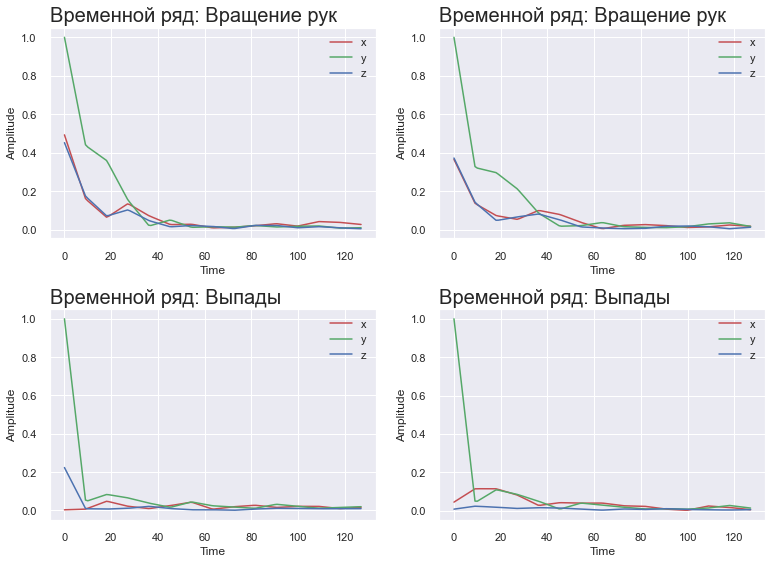

In [16]:
plt.figure(figsize=(11, 8))

sbp = plt.subplot(2, 2, 1)
sbp.grid()
plotTimeSeries(Step,random.randint(0,266))

sbp = plt.subplot(2, 2, 2)
sbp.grid()
plotTimeSeries(Step,random.randint(0,266))

sbp = plt.subplot(2, 2, 3)
sbp.grid()
plotTimeSeries(Step,random.randint(266,266+142))

sbp = plt.subplot(2, 2, 4)
sbp.grid()
plotTimeSeries(Step,random.randint(266,266+142))
plt.tight_layout()

# Нормализация

Сравним графики до и после перенормировки.

Раньше: мы видели, что количество сэмплов переменное, поэтому мы нужно масштабировать их количество.

После: мы видим, что количество выборок одинаково для обоих упражнений и равно константе.

![image](./img/normint.png)

In [17]:
def plotTimeSeriesFromfile(filename, normalize = None):

    data = pd.read_csv(filename, delimiter=',')
    plt.title('Time series of ' + exercise[int(data['val'][0])], fontsize=20, loc="left")

    if (normalize == None):
        step = data.size
        plt.plot(data.index[0:step], data['x'],'-' , color='r', label='x')
        plt.plot(data.index[0:step], data['y'],'-' , color='g', label='y')
        plt.plot(data.index[0:step], data['z'],'-' , color='b', label='z')

    if (normalize == True):
        data = renormalize(data['x'],data['y'],data['z'],Step,0)
        plt.plot(data[0],'-' , color='r', label='x')
        plt.plot(data[1],'-' , color='g', label='y')
        plt.plot(data[2],'-' , color='b', label='z')  

    plt.legend()
    plt.ylabel('Amplitude')
    plt.xlabel('Time');  
    plt.grid()
    return None

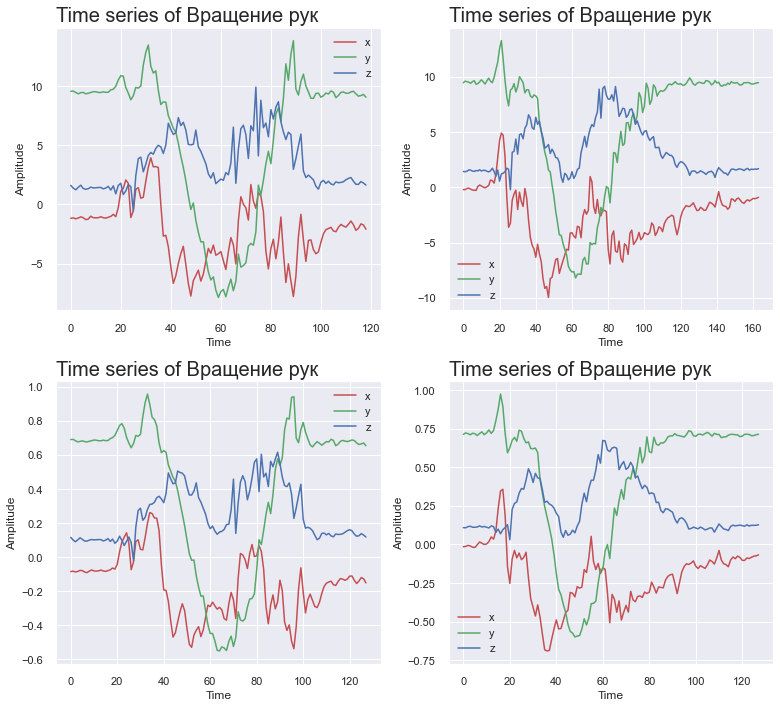

In [18]:
# BEFORE
plt.figure(figsize=(11, 10)) # define the size of plots

sbp = plt.subplot(2, 2, 1)
sbp.grid()
plotTimeSeriesFromfile(r'DATASET_SORTED\0.Вращение рук (266)\RAW\A\0_XA_(345).csv', normalize = None)

sbp = plt.subplot(2, 2, 2)
sbp.grid()
plotTimeSeriesFromfile(r'DATASET_SORTED\0.Вращение рук (266)\RAW\A\0_XA_(350).csv', normalize = None)

# AFTER
sbp = plt.subplot(2, 2, 3)
sbp.grid()
plotTimeSeriesFromfile(r'DATASET_SORTED\0.Вращение рук (266)\RAW\A\0_XA_(345).csv', normalize = True)

sbp = plt.subplot(2, 2, 4)
sbp.grid()
plotTimeSeriesFromfile(r'DATASET_SORTED\0.Вращение рук (266)\RAW\A\0_XA_(350).csv', normalize = True)
plt.tight_layout()

# Сохранение датасета

Может быть полезно в будущем

In [19]:
df.to_csv('DATASET_SORTED\dataset.csv')
dataset = pd.read_csv('DATASET_SORTED\dataset.csv', delimiter=',')
dataset.drop(columns='Unnamed: 0')

,0,1,2,3,4,5,6,7,8,9,...,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823
0,0.556713,0.359893,0.092545,0.313176,0.383985,0.301220,0.378118,0.395058,0.385130,0.334911,...,0.089315,0.052965,0.091322,0.084108,0.084622,0.113228,0.142534,0.128578,0.143020,0.123569
1,0.523089,0.338745,0.084938,0.296412,0.361144,0.282463,0.354607,0.368006,0.355453,0.313491,...,0.086063,0.053320,0.087165,0.078948,0.082035,0.103850,0.129301,0.117144,0.129601,0.112588
2,0.489464,0.317597,0.077331,0.279648,0.338303,0.263707,0.331097,0.340953,0.325775,0.292072,...,0.082812,0.053674,0.083008,0.073787,0.079448,0.094471,0.116068,0.105710,0.116183,0.101607
3,0.455840,0.296450,0.069724,0.262884,0.315462,0.244951,0.307586,0.313900,0.296097,0.270653,...,0.079561,0.054029,0.078850,0.068626,0.076860,0.085093,0.102835,0.094277,0.102764,0.090626
4,0.422216,0.275302,0.062116,0.246120,0.292622,0.226195,0.284075,0.286847,0.266420,0.249234,...,0.076309,0.054383,0.074693,0.063465,0.074273,0.075714,0.089602,0.082843,0.089345,0.079645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.005361,0.008821,0.004175,0.009470,0.038020,0.013949,0.010324,0.009903,0.005878,0.018685,...,0.009416,0.011095,0.005967,0.014631,0.011959,0.013977,0.003908,0.010624,0.020040,0.020046
381,0.004832,0.008263,0.004347,0.009072,0.039687,0.014243,0.008901,0.009525,0.004731,0.019793,...,0.008985,0.009060,0.005896,0.012118,0.011926,0.013748,0.004160,0.011034,0.020347,0.020741
382,0.004303,0.007704,0.004519,0.008674,0.041353,0.014537,0.007479,0.009146,0.003583,0.020900,...,0.008553,0.007024,0.005826,0.009605,0.011893,0.013519,0.004411,0.011444,0.020654,0.021435
383,0.003774,0.007146,0.004690,0.008276,0.043020,0.014831,0.006057,0.008768,0.002436,0.022008,...,0.008122,0.004988,0.005755,0.007093,0.011860,0.013290,0.004663,0.011854,0.020961,0.022129


# Быстрое преобразование Фурье (БПФ)
Идея состоит в том, чтобы перевести зависимости амплитуды из временной области в частотную и получить спектр сигнала.
Затем мы можем взять низкочастотную часть спектра, которая содержит наибольшую энергию сигнала и, следовательно, основную информацию об упражнении.

Поступая таким образом, мы можем отсечь высокие части спектра, потому что они связаны с шумом и тремором тела.
Почему мы можем это сделать?

Масса тела человека довольно большая, упражнения имеют большую амплитуду, поэтому наиболее характерные частоты низкие.


![image](./img/FT.gif)

# Графики БПФ

Давайте посмотрим на 6 спектров случайно выбранных графиков.

Что мы видим?

В основном, наибольшие амплитуды попадают в первые 20% информативных отсчетов.

In [20]:
from scipy.fft import fft

def plotFFT(outSize, ind, df):
    
    X = np.array(df[ind][0:Step])
    Y = np.array(df[ind][Step:2*Step])
    Z = np.array(df[ind][2*Step:3*Step])
    
    index = np.arange(len(X))
    values1 = np.abs(fft(X))
    values2 = np.abs(fft(Y))
    values3 = np.abs(fft(Z))
    
    max = np.max(values1)
    if (np.max(values2) > max):
        max = np.max(values2)
    if (np.max(values3) > max):
        max = np.max(values3)
        
    values1 = values1/max
    values2 = values2/max
    values3 = values3/max
        
    bw = 0.25
    
    plt.title('БПФ: ' + exercise[int(np.array(df[ind][3*Step]))], fontsize=20, loc="left")
    plt.axis([0,len(X)*outSize,0,1.05])
    plt.bar(index, values1, width =bw, color='r', label='x')
    plt.bar(index+bw, values2, width = bw, color='g', label='y')
    plt.bar(index+2*bw, values3,width = bw, color='b', label='z')
    plt.legend()
    plt.grid(axis = 'y')

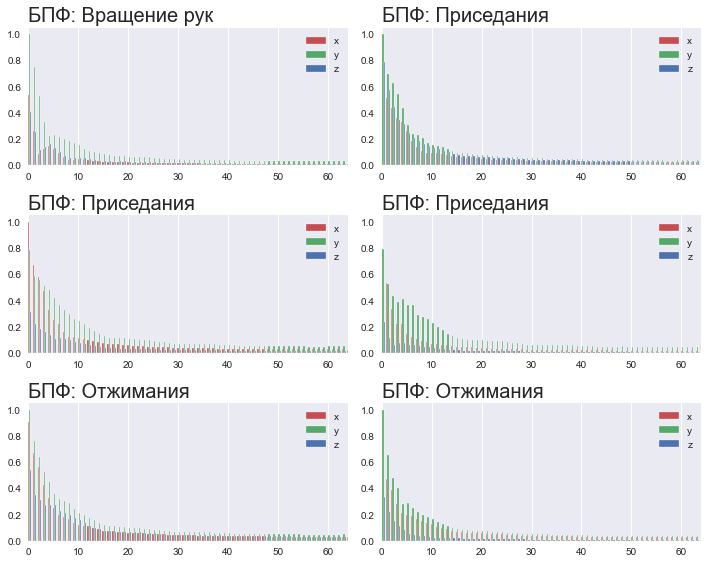

In [21]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10, 8)) # define the size of plots

    plt.subplot(3, 2, 1)
    plotFFT(0.5,str(random.randint(0,1820)),dataset)

    plt.subplot(3, 2, 2)
    plotFFT(0.5,str(random.randint(0,1820)),dataset)

    plt.subplot(3, 2, 3)
    plotFFT(0.5,str(random.randint(0,1820)),dataset)

    plt.subplot(3, 2, 4)
    plotFFT(0.5,str(random.randint(0,1820)),dataset)

    plt.subplot(3, 2, 5)
    plotFFT(0.5,str(random.randint(0,1820)),dataset)

    plt.subplot(3, 2, 6)
    plotFFT(0.5,str(random.randint(0,1820)),dataset)
    plt.tight_layout()

# Сравним графики БПФ различных упражнений

Сравним графики 4-х произвольно выбранных повторений упражнений: 2 из них - один вид упражнения, 2 - другой.

Что мы видим?

Мы видим, что графики для одного упражнения похожи, но графики для разных упражнений не похожи.

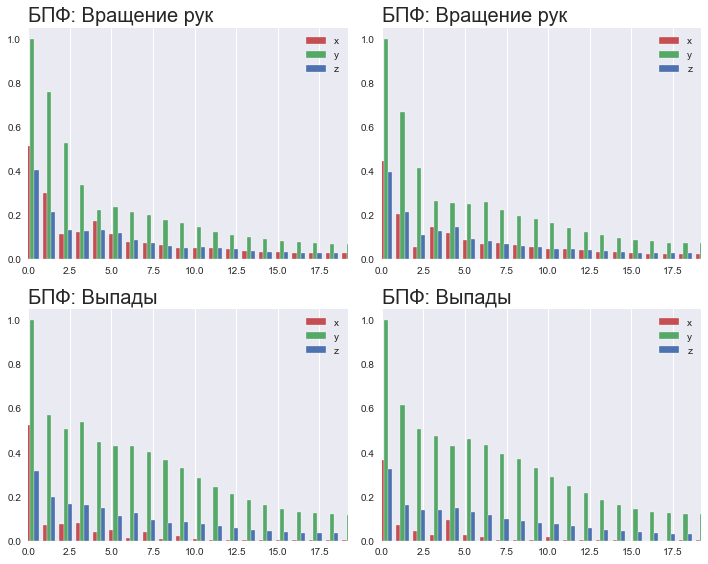

In [22]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(10, 8))

    plt.subplot(2, 2, 1)
    plotFFT(0.15,str(random.randint(0,265)),dataset)

    plt.subplot(2, 2, 2)
    plotFFT(0.15,str(random.randint(0,265)),dataset)

    plt.subplot(2, 2, 3)
    plotFFT(0.15,str(random.randint(267,366)),dataset)

    plt.subplot(2, 2, 4)
    plotFFT(0.15,str(random.randint(267,366)),dataset)
    plt.tight_layout()

# Обработка набора данных: от временной области к частотной
#### Функция БПФ

In [23]:
def doFFT(outSize, ind, df):
    
    X = np.array(df[ind][0:Step])
    Y = np.array(df[ind][Step:2*Step])
    Z = np.array(df[ind][2*Step:3*Step])
    
    size = int(len(X)*outSize)
    
    index = np.arange(len(X))
    values1 = np.abs(fft(X))
    values2 = np.abs(fft(Y))
    values3 = np.abs(fft(Z))
    
    max = np.max(values1)
    if (np.max(values2) > max):
        max = np.max(values2)
    if (np.max(values3) > max):
        max = np.max(values3)
        
    values1 = values1[0:size]/max
    values2 = values2[0:size]/max
    values3 = values3[0:size]/max
    
    df1 = pd.DataFrame(values1[0:size])
    df2 = pd.DataFrame(values2[0:size])
    df3 = pd.DataFrame(values3[0:size])

    df4 = pd.concat([df1, df2,df3], axis=0, ignore_index=True)
    df4.loc[df4.size] = df.iloc[3*Step][ind]
    return df4

#### БПФ для всех объектов из датасета

In [24]:
def mergePaths(outSize,df):
    liOne = []
    for number in range(df.shape[1]-1):
        dfOne = doFFT(outSize,str(number),df)
        liOne.append(dfOne)
    dfMerged = pd.concat(liOne, axis=1, ignore_index=True)
    return dfMerged

#### БПФ
FFTSIZE - процент важных гармоник. Оно должно быть меньше 0,5, потому что спектр симметричен, и мы можем исключить 50% отсчетов (до N/2-1 включительно)

In [25]:
FFTSIZE = 0.12
datasetFFT = mergePaths(FFTSIZE,dataset).T

# Сохранение датасета с БПФ

Возможно, это пригодится в будущем

In [26]:
datasetFFT.to_csv('DATASET_SORTED\datasetFFTA.csv')
dataFFT = pd.read_csv('DATASET_SORTED\datasetFFTA.csv', delimiter=',')
# dataFFT.drop(columns='Unnamed: 0')
datasetFFT

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.537751,0.349060,0.234963,0.123331,0.121088,0.138525,0.110378,0.087464,0.072465,0.070719,...,0.119219,0.086695,0.073128,0.075423,0.072041,0.062525,0.051898,0.046983,0.041477,0.0
1,0.485354,0.218939,0.119563,0.097709,0.158440,0.144649,0.078283,0.062978,0.052310,0.038305,...,0.088847,0.069869,0.056513,0.051292,0.055935,0.052103,0.043803,0.038586,0.034197,0.0
2,0.285355,0.128913,0.089146,0.077009,0.051791,0.043722,0.052419,0.056763,0.049579,0.045434,...,0.146433,0.128213,0.113571,0.100963,0.094456,0.084794,0.076836,0.067046,0.058193,0.0
3,0.450661,0.199661,0.129834,0.091044,0.142627,0.096531,0.075357,0.053838,0.041145,0.037831,...,0.092990,0.070421,0.056555,0.053863,0.055564,0.053803,0.044828,0.039124,0.034567,0.0
4,0.605221,0.245436,0.158437,0.102836,0.109484,0.139988,0.079100,0.061880,0.050871,0.042287,...,0.110640,0.087075,0.075275,0.075360,0.073104,0.059983,0.052038,0.046424,0.040805,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.264133,0.018966,0.045210,0.063153,0.046409,0.039210,0.026857,0.020832,0.022415,0.014304,...,0.010639,0.013933,0.011468,0.010674,0.007865,0.008893,0.007838,0.005846,0.005321,6.0
1820,0.215990,0.047878,0.048608,0.036163,0.011163,0.041612,0.027455,0.028837,0.028011,0.021026,...,0.014976,0.015542,0.013199,0.012195,0.011443,0.008794,0.008974,0.007025,0.006373,6.0
1821,0.317090,0.025740,0.068384,0.032276,0.016838,0.034488,0.030174,0.027552,0.030253,0.019667,...,0.012714,0.014575,0.012147,0.012150,0.009140,0.008633,0.008693,0.006503,0.005937,6.0
1822,0.277521,0.030398,0.039866,0.026184,0.054570,0.035834,0.034647,0.027985,0.020194,0.022136,...,0.008574,0.010395,0.010778,0.008328,0.008394,0.005536,0.006046,0.004614,0.003981,6.0


# Делим датафрейм на X (входы) и Y (выходы)

In [27]:
X = datasetFFT.iloc[0:,0:int(FFTSIZE*Step)*3]
Y = datasetFFT[int(FFTSIZE*Step)*3]

In [28]:
X

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.537751,0.349060,0.234963,0.123331,0.121088,0.138525,0.110378,0.087464,0.072465,0.070719,...,0.128004,0.119219,0.086695,0.073128,0.075423,0.072041,0.062525,0.051898,0.046983,0.041477
1,0.485354,0.218939,0.119563,0.097709,0.158440,0.144649,0.078283,0.062978,0.052310,0.038305,...,0.124552,0.088847,0.069869,0.056513,0.051292,0.055935,0.052103,0.043803,0.038586,0.034197
2,0.285355,0.128913,0.089146,0.077009,0.051791,0.043722,0.052419,0.056763,0.049579,0.045434,...,0.175325,0.146433,0.128213,0.113571,0.100963,0.094456,0.084794,0.076836,0.067046,0.058193
3,0.450661,0.199661,0.129834,0.091044,0.142627,0.096531,0.075357,0.053838,0.041145,0.037831,...,0.117316,0.092990,0.070421,0.056555,0.053863,0.055564,0.053803,0.044828,0.039124,0.034567
4,0.605221,0.245436,0.158437,0.102836,0.109484,0.139988,0.079100,0.061880,0.050871,0.042287,...,0.140737,0.110640,0.087075,0.075275,0.075360,0.073104,0.059983,0.052038,0.046424,0.040805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,0.264133,0.018966,0.045210,0.063153,0.046409,0.039210,0.026857,0.020832,0.022415,0.014304,...,0.016749,0.010639,0.013933,0.011468,0.010674,0.007865,0.008893,0.007838,0.005846,0.005321
1820,0.215990,0.047878,0.048608,0.036163,0.011163,0.041612,0.027455,0.028837,0.028011,0.021026,...,0.021699,0.014976,0.015542,0.013199,0.012195,0.011443,0.008794,0.008974,0.007025,0.006373
1821,0.317090,0.025740,0.068384,0.032276,0.016838,0.034488,0.030174,0.027552,0.030253,0.019667,...,0.016919,0.012714,0.014575,0.012147,0.012150,0.009140,0.008633,0.008693,0.006503,0.005937
1822,0.277521,0.030398,0.039866,0.026184,0.054570,0.035834,0.034647,0.027985,0.020194,0.022136,...,0.009193,0.008574,0.010395,0.010778,0.008328,0.008394,0.005536,0.006046,0.004614,0.003981


In [29]:
Y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1819    6.0
1820    6.0
1821    6.0
1822    6.0
1823    6.0
Name: 45, Length: 1824, dtype: float64

# Снижение размерности
## t-SNE метод

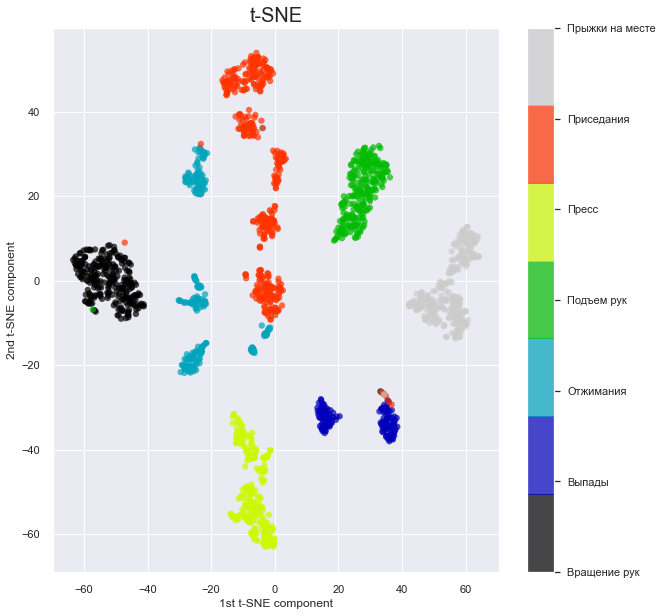

In [30]:
import seaborn as sns

from sklearn.manifold import TSNE

tsne = TSNE(random_state=33)

# t-SNE transformation
X_tsne = tsne.fit_transform(X)

# print results t-SNE
plt.figure(figsize=(10,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, 
            edgecolor='none', alpha=0.7, s=40, # for colorbar
            cmap=plt.cm.get_cmap('nipy_spectral', 7)) # for colorbar
cbar = plt.colorbar()
# cbar.ax.set_yticklabels(['Hand rotation','Ups','Push-ups','Raise hands','Press','Squats','Jumping in place'])
cbar.ax.set_yticklabels([exercise[0],exercise[1],exercise[2],exercise[3],exercise[4],exercise[5],exercise[6]])

# print lables
plt.xlabel('1st t-SNE component')
plt.ylabel('2nd t-SNE component')
plt.title('t-SNE', fontsize=20);

Рассмотрим данные при помощи методов понижения размерности. Нами был выбран метод t-SNE как один из лучших для визуализации данных. При мы обнаружили интересную, но вполне ожидаемую особенность: число отображаемых кластеров зависит от того, сколько человек участвовали в сборке датасета. Например, Приседания делало 4 человека, Прыжки на месте делали 2 человека, а Вращение рук и Подъем рук только один человек.

Хорошие вопросы для будущих исследований:
Реально ли распознать технику упражнений у разных людей ?
Реально ли давать советы, как исправить технику ?

## Балансировка

Text(0.5, 0, 'Номер упражнения')

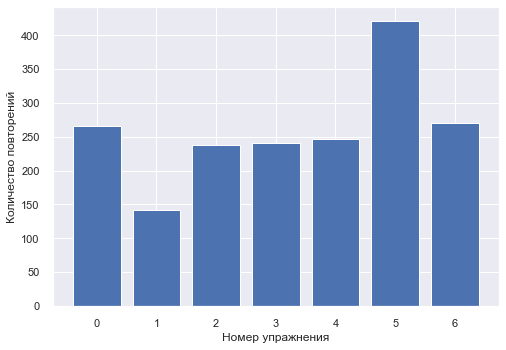

In [31]:
plt.bar(Y.value_counts().index.tolist(),Y.value_counts())
plt.ylabel('Количество повторений')
plt.xlabel('Номер упражнения')

Мы видим, что данные не сбалансированы. Это может сыграть роль в оценке точности.
Cбалансируем данные, выбрав случайные упражнения для каждого набора.

Text(0.5, 0, 'Номер упражнения')

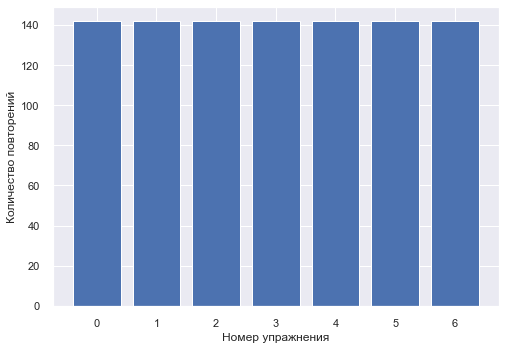

In [32]:
def balanceData(X, Y):
    min_val = Y.value_counts().min()
    XY = pd.concat([X,Y], axis=1, sort = False)
    
    a0 = (XY.loc[XY[X.shape[1]]==0]).sample(min_val)
    a1 = (XY.loc[XY[X.shape[1]]==1]).sample(min_val)
    a2 = (XY.loc[XY[X.shape[1]]==2]).sample(min_val)
    a3 = (XY.loc[XY[X.shape[1]]==3]).sample(min_val)
    a4 = (XY.loc[XY[X.shape[1]]==4]).sample(min_val)
    a5 = (XY.loc[XY[X.shape[1]]==5]).sample(min_val)
    a6 = (XY.loc[XY[X.shape[1]]==6]).sample(min_val)
    
    XY_res = pd.concat([a0,a1,a2,a3,a4,a5,a6], axis = 0, sort = False)
    
    Y_res = XY_res[X.shape[1]]
    return XY_res.drop(columns = X.shape[1]), Y_res

X1,Y1 = balanceData(X,Y)
plt.bar(Y1.value_counts().index.tolist(),Y1.value_counts())
plt.ylabel('Количество повторений')
plt.xlabel('Номер упражнения')

Теперь у нас есть сбалансированные данные. Давайте разделим наши данные на наборы данных для обучения и тестирования.
Test будет составлять 20% данных, а Train - 80%.
Мы выбрали stratify = Y, чтобы иметь сбалансированные данные в наборах данных для обучения и тестирования.

# Делим датафрейм на X (входы) и Y (выходы)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state=50)
print(X_train.shape)
print(X_test.shape)

(1459, 45)
(365, 45)


# Логистическая регрессия
Использован gridsearch с настраиваемыми параметрами, такими как
C - параметр штрафа. (l2-регуляризация)

max_iter - Максимальное количество итераций
5-кратную перекрестная проверка.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = {
        "C":np.logspace(-2,4,6), 
        "penalty":["l2"],
        "max_iter":np.arange(10,60,5)  
        }

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, grid, cv = 5 , n_jobs= -1, verbose=10)

logreg_cv.fit(X_train, Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1988s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 300 ou

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 1.58489319e-01, 2.51188643e+00, 3.98107171e+01,
       6.30957344e+02, 1.00000000e+04]),
                         'max_iter': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55]),
                         'penalty': ['l2']},
             verbose=10)

### Оптимальный параметр регуляризации
Мы заметили, что C изменяется с каждым экспериментом. Возможно, это связано с небольшим объемом данных и большим влиянием выбросов.

In [35]:
print('Optimal C parameter : ', logreg_cv.best_estimator_)

Optimal C parameter :  LogisticRegression(C=39.81071705534969, max_iter=35)


## Метрики
precision_score как критерий нашей модели.

In [36]:
from sklearn.metrics import accuracy_score
y_pred_test = logreg_cv.best_estimator_.predict(X_test)
print('Accuracy score: ',accuracy_score(Y_test, y_pred_test))

Accuracy score:  0.9835616438356164


## Веса элементов
Здесь мы построили вклад весов в модель.

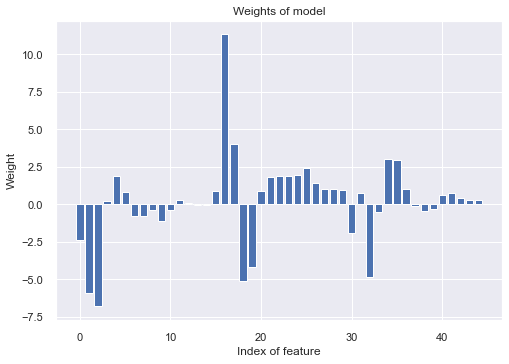

In [37]:
import numpy as np

coefs = logreg_cv.best_estimator_.coef_[0]

plt.bar(np.arange(0,X.shape[1]), coefs)
plt.title('Weights of model')
plt.xlabel('Index of feature')
plt.ylabel('Weight');

## Матрица неточностей
Еще одна метрика для оценки нашей модели

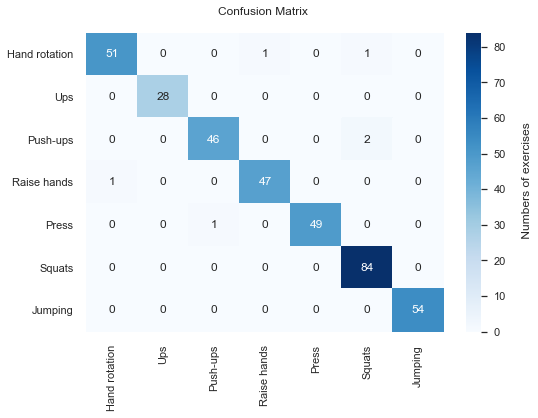

In [38]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(Y_test, y_pred_test)
#plot_confusion_matrix(logreg_cv.best_estimator_, X_test, Y_test, cmap= 'Blues')

x_axis_labels = y_axis_labels= ['Hand rotation', 'Ups' , 'Push-ups', 'Raise hands', 'Press', 'Squats', 'Jumping']
sns.heatmap(cf, annot=True,cmap="Blues",yticklabels=y_axis_labels ,xticklabels=x_axis_labels, cbar_kws={'label': ' \n Numbers of exercises'}).set_title('Confusion Matrix \n');

# Модель случайного леса

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(n_estimators=10, max_features = 7, max_depth=8, random_state=42) 

rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)

print(accuracy_score(Y_test, y_pred))

0.9808219178082191


In [40]:
rs = []
for m in rfc.estimators_:
    rs.append(m.random_state)
print(rs)

[1608637542, 1273642419, 1935803228, 787846414, 996406378, 1201263687, 423734972, 415968276, 670094950, 1914837113]


In [41]:
from tqdm import tqdm
def rf_train_test_accuracy(param_name, param_grid, **params):
    
    train_score, test_score = [], []
    clf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth=8, random_state=42, n_jobs=-1)
    if params:
        clf.set_params(**params)
    
    for param_value in tqdm(param_grid):
        clf.set_params(**{param_name: param_value})
        clf.fit(X_train, Y_train)

        train_score.append(accuracy_score(Y_train, clf.predict(X_train)))
        test_score.append(accuracy_score(Y_test, clf.predict(X_test)))

    return train_score, test_score

In [42]:
train_accuracy, test_accuracy = rf_train_test_accuracy('n_estimators', range(1, 50, 2))

100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:02<00:00, 11.36it/s]


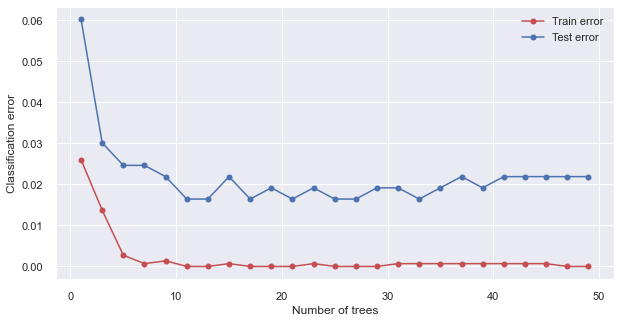

In [43]:
train_error_1 = 1-np.array(train_accuracy)
test_error_1 = 1-np.array(test_accuracy)

plt.figure(figsize=(10,5))
plt.plot(list(range(1,50,2)), train_error_1, c='r', label='Train error', marker = 'o' )
plt.plot(list(range(1,50,2)), test_error_1, c='b', label='Test error', marker = 'o')
plt.xlabel('Number of trees')
plt.ylabel('Classification error')
plt.legend();

In [44]:
train_accuracy, test_accuracy = rf_train_test_accuracy('max_depth', range(1, 30))

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 20.35it/s]


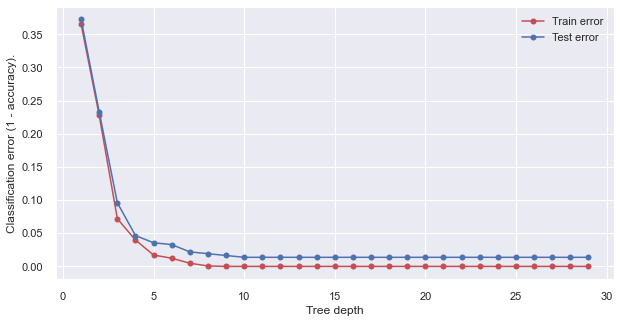

In [45]:
test_error = 1-np.array(test_accuracy)

plt.figure(figsize=(10,5))
plt.plot(list(range(1,30)), 1-np.array(train_accuracy), c='r', label='Train error', marker = 'o')
plt.plot(list(range(1,30)), test_error, c='b', label='Test error', marker = 'o')
plt.xlabel('Tree depth')
plt.ylabel('Classification error (1 - accuracy).')
plt.legend();

In [46]:
opt_depth = test_error.argmin()
opt_depth

9

In [51]:
train_score, test_score = [], []
clf = RandomForestClassifier(n_estimators=4, max_features=8, max_depth=8, random_state=42, n_jobs=-1)

clf.fit(X_train, Y_train)

train_score.append(accuracy_score(Y_train, clf.predict(X_train)))
test_score.append(accuracy_score(Y_test, clf.predict(X_test)))
print(train_score, test_score)

[0.9910897875257025] [0.9753424657534246]


## XG boost
Здесь мы обучили модель XG boost.

In [48]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

dtrain = xgb.DMatrix(X_train,label = Y_train)
dtest = xgb.DMatrix(X_test, label = Y_test)


param = {
   'max_depth': 5,
   'eta': 0.3, 
   'objective': 'multi:softprob',
   'num_class': 7}
num_round = 20


boost = xgb.train(param, dtrain, num_round)
preds = boost.predict(dtest)

Здесь мы оценили метрики модели xgboost

0.9754982762335703


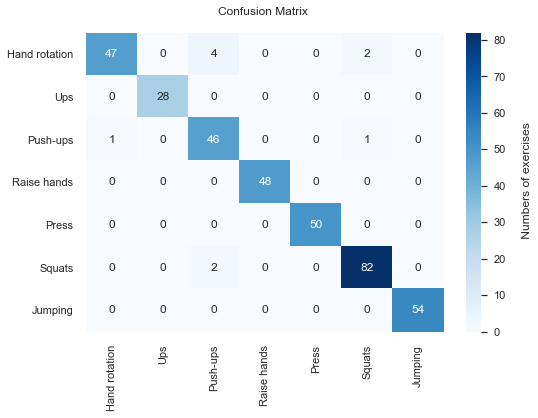

In [49]:
import numpy as np
from sklearn.metrics import precision_score

best_preds = np.asarray([np.argmax(line) for line in preds])
print(precision_score(Y_test, best_preds, average='macro'))

cf2 = confusion_matrix(Y_test, best_preds)
#plot_confusion_matrix(logreg_cv.best_estimator_, X_test, Y_test, cmap= 'Blues')

x_axis_labels = y_axis_labels= ['Hand rotation', 'Ups' , 'Push-ups', 'Raise hands', 'Press', 'Squats', 'Jumping']

sns.heatmap(cf2, annot=True,cmap="Blues",yticklabels=y_axis_labels ,xticklabels=x_axis_labels, cbar_kws={'label': ' \n Numbers of exercises'}).set_title('Confusion Matrix \n');

Таким образом, xgboost имеет худший результат, чем логистическая регрессия с этим набором данных.
Здесь мы заметили, что это нормально.
https://stats.stackexchange.com/questions/394705/classification-xgboost-vs-logistic-regression

Полученные результаты:

1) Возможно обнаружение и распознавание различных физических упражнений (точность при сбалансированных тестах - 0,99497)

2) Большая часть информации содержится в первых 10 гармониках преобразования Фурье (низкие частоты). Это позволяет сократить количество вводимых данных в 10 раз!

3) У нас очень маленький набор данных с выбросами
- Необходимо расширить набор данных (используя реальные эксперименты или аугментацию).
- Необходимо найти и отбросить выбросы.

4) Необходимо изучить возможность распознавания разных техник одного и того же упражнения.

5) В будущем с помощью смартфонов можно будет не только определять вид физической активности, но и рассчитывать конкретные виды упражнений.